# Matplotlib - Overview
* multi-platform data visualization library built on NumPy arrays
* designed to wor with SciPy stack

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

## Histograms
* plt.hist( )

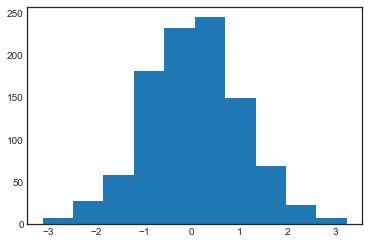

In [2]:
data= np.random.randn(1000)

plt.hist(data);

* many options available

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


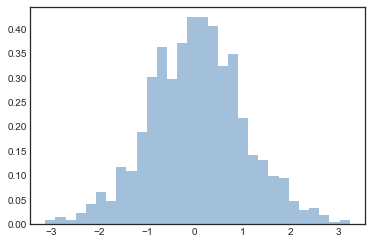

In [3]:
plt.hist(data, bins=30, normed=True, alpha=0.5, histtype='stepfilled', color='steelblue',
        edgecolor='none');

* can plot several at once

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


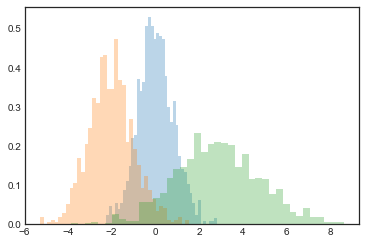

In [4]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

#### Count the number of points in each bin - using np.histogram( )

In [5]:
counts, bin_edges = np.histogram(data, bins=5)

print(counts)

[ 35 239 477 219  30]


## 2-D Histograms
* using plt.hist2d( )

In [6]:
mean = [0,0]
cov = [[1,1], [1,2]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

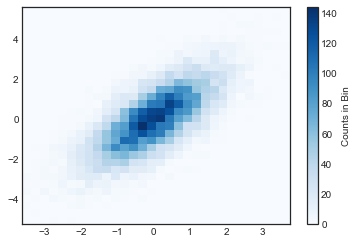

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')

cb = plt.colorbar()
cb.set_label('Counts in Bin')

* for Hexagonal binnings - use plt.hexbin( )

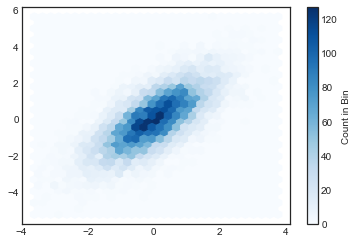

In [8]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')

cb = plt.colorbar(label='Count in Bin')

## Kernel Density Estimation - KDE
* evaluate densities of multiple dimensions
* iron out the points in space - obtaining a smooth function
* use scipy.stats

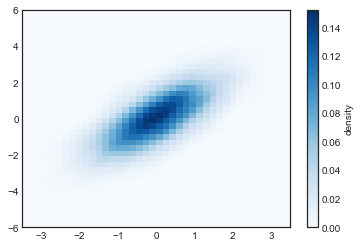

In [9]:
from scipy.stats import gaussian_kde

data = np.vstack([x,y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6,6,40)
Xgrid, Ygrid = np.meshgrid(xgrid,ygrid)

Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto', extent=[-3.5,3.5,-6,6],
          cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')

# Plot Legends
### Size of Points
* specify the scale of point size

In [10]:
import pandas as pd
plt.style.use('classic')

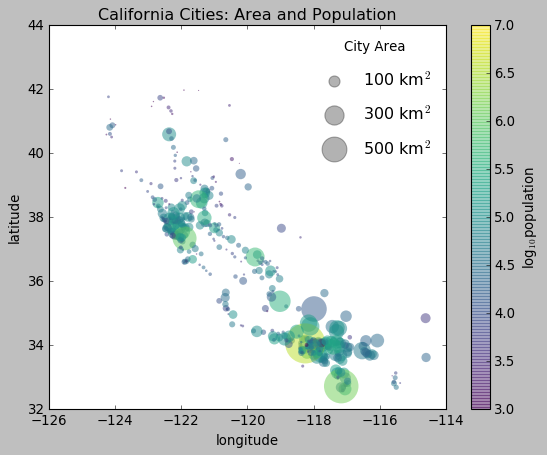

In [16]:
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')

lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

plt.scatter(lon, lat, label=None,
           c = np.log10(population), cmap='viridis',
           s = area, linewidth = 0, alpha = 0.5)

plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$population')
plt.clim(3,7)

# create legend

for area in [100,300,500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');

### Multiple Legends
* must create a new legend artist from scratch
* use ax.add_artist( ) - manually add the 2nd legend

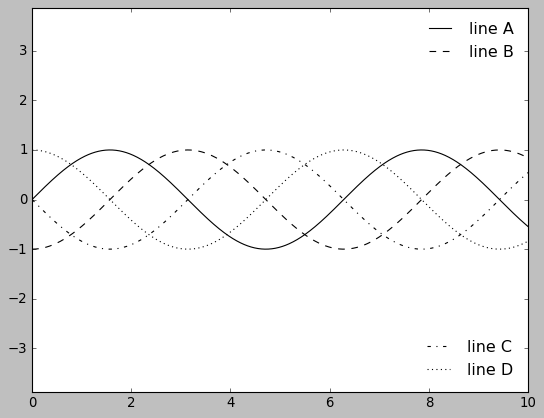

In [17]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']

x = np.linspace(0,10,1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'],
         loc='upper right', frameon=False)

from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['line C', 'line D'],
            loc='lower right', frameon=False)
ax.add_artist(leg);

# Colorbars & Colormaps
* good for continuous labels based on the color of data

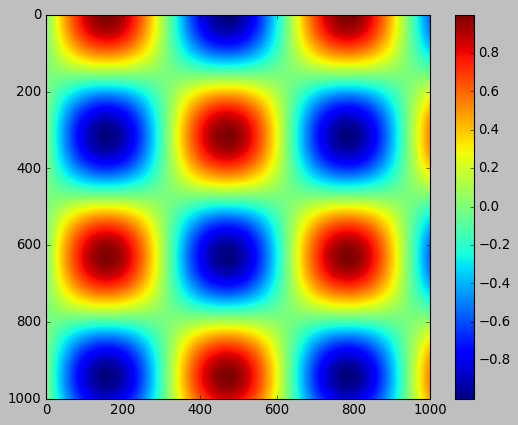

In [18]:
x = np.linspace(0,10,1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

* customize using cmap

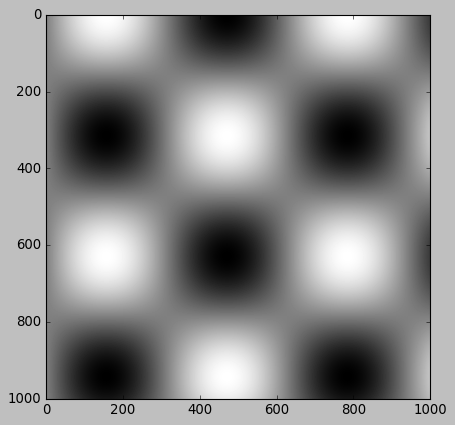

In [19]:
plt.imshow(I, cmap='gray');

### Colormap selection
* 3 general categories
    * Sequential - continuous sequence (binary, viridis, etc)
    * Divergent - usually 2 distinct colors deviating from a mean (RdBu, PuOr, etc)
    * Qualitative - mix with no reason (rainbow, jet, etc)

#### Convert the jet colorbar to black & white 
* convert RGBA to grayscale luminance
* plot colormap with the grayscale equivalent

In [24]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3]  ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6,2), subplot_kw=dict(xticks=[], yticks=[]))
    
    ax[0].imshow([colors], extent=[0,10,0,1])
    ax[1].imshow([grayscale], extent=[0,10,0,1])

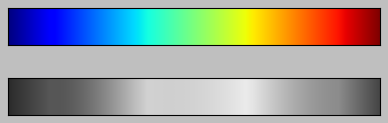

In [25]:
view_colormap('jet')

#### A different colormap (viridis) - avoids the bright stripes noticeable above

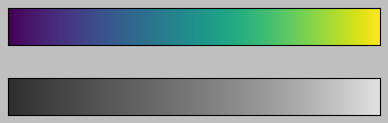

In [26]:
view_colormap('viridis')

#### Other options allow for a similar spectrum to jet, without the stripes

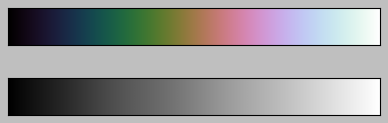

In [29]:
view_colormap('cubehelix')

### Color Limits & Extensions
* the colorbar, is a plt.Axes instance - with flexibility
* color limits can be narrowed
* boundaries can be set with the *extend* setting

#### Helpful when displaying images that are subject to Noise

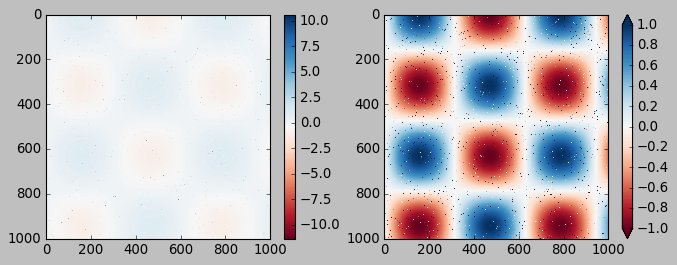

In [30]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0,3, np.count_nonzero(speckles))

plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1,2,2,)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1);

* Left plot - color limits respond to noise (range prevents pattern of interest)
* Right plot - extensions added to include what is desired (above or below the limits)

### Discrete Colorbars
* by default, they are continuous
* discrete values can be represented - using plt.cm.get_cmap( )

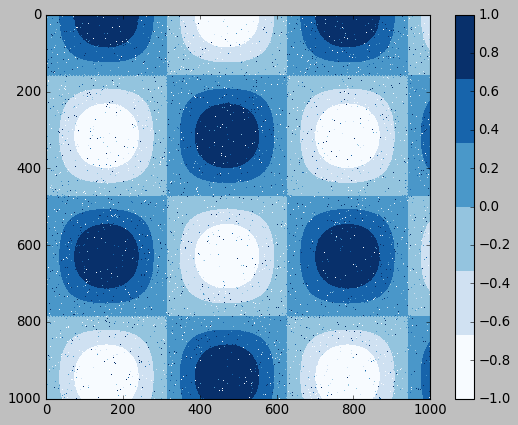

In [31]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1,1);